# Introduction 
This is a Python Notebook where I will be working on creating a ML model to classify images of digits handwritten by high school students. It is a classic problem which I will be using to test the petformance of the model I create 

# Data Ingestion 
Loading in data using fetch_openml

In [63]:
#libraries to import 
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
#loading in data and carrying out EDA
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# EDA
Exploring the data 

In [4]:
#shape of data 
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

70,000 images with 784 features (since these are images, the features here indicate the shape of each image in pixels, here it points to 28x28 pixel images)

In [5]:
print(X.iloc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64


Given the fact that the first image in X is a Series object, we will have to first convert it into a 2D Numpy array then reshape to 28x28 before we can visualize it 

In [6]:
image_data = X.iloc[0].to_numpy().reshape(28, 28)

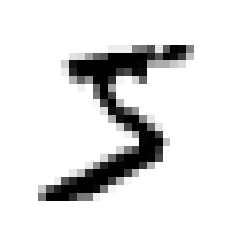

In [7]:
plt.imshow(image_data, cmap='binary')
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

The above image depicts the number '5'

In [9]:
#convert y to a number since ML algo expects numbers 
y = y.astype(np.uint8)

## Splitting Data into train and test

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Classifier

In [11]:
#binary classifier 
#here we are training it only to recognise 5 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([X_train.to_numpy()[0]])

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measuring 
Here we will measure accuracy of the sgd classifier using cross-validation 

In [13]:
##using cross validation 
# skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

In [14]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
#creating confusion matrix 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
print(f"Precision score: {precision_score(y_train_5, y_train_pred)}")
print(f"Recall score: {recall_score(y_train_5, y_train_pred)}")

Precision score: 0.8370879772350012
Recall score: 0.6511713705958311


In [17]:
#plotting the precisoon and recall 

#getting the cross_val_predict() func to get decision scores 
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [18]:
print(y_scores[0])

print(y_train_5.shape)

[-35364.44199317 -40951.93277956 -15770.0373684   -2099.08975467
 -49770.59859549    640.21148168 -39121.36070491 -21962.14366301
 -16628.35086446 -24932.71053257]
(60000,)


In [19]:
# vals  = precision_recall_curve(y_train_5.to_numpy(), y_scores)

In [20]:
#function to plot da graphs
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")    

In [21]:
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show()

In [22]:
#roc curve 

# fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

## Training different models 
Training RandomForestClassifier

In [23]:
#randomforest classifier 
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [24]:
y_scores_forest = y_probas_forest[:, 1]

In [25]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

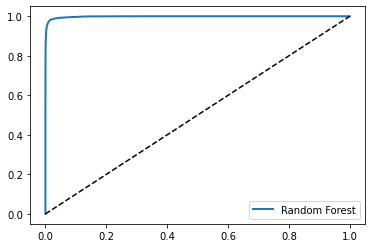

In [28]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# MultiClass Classification 
In this section we are working on models to classify more than just 5s

In [36]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [37]:
svm_clf.predict([X_train.to_numpy()[0]])

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [38]:
some_digit = X_train.to_numpy()[0]
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [39]:
np.argmax(some_digit_scores)

5

In [42]:
# OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWar

array([5], dtype=uint8)

In [43]:
#sgd classifier 
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [44]:
sgd_clf.decision_function([some_digit])

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

## Error Analysis

In [ ]:
#refer to page 130 in the book Hands on ML 

## Multilabel Classification 
Multiple binary tags assignment. 
We will be following the book and using KNeighborsClassifier


In [50]:
#bascially we are training a k neighbor classifier to recognise which numbers are larger than or equal to 7 and which numbers are odd 
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [51]:
knn_clf.predict([some_digit])

/Users/shariqmalik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [53]:
#f1 score to assess performance 
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## KNeighborClassifier for MNIST
After assessing the performance on the dataset for the task of classifying whther a number is grater than 7 or if it is an odd number, we will now build a more general classifier using the same approach.

In [58]:
#just an extra step to explore the class distribution in MNIST 
class_dist = y_train.value_counts()
class_dist

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: class, dtype: int64

In [61]:
knn_clf_general = KNeighborsClassifier()
knn_clf_general.fit(X_train, y_train)

#test the model 
y_pred = knn_clf_general.predict(X_test)
#get the accuracy 
accuracy = accuracy_score(y_test,y_pred)

In [62]:
accuracy

0.9688

In [64]:
##fine tuning hyper parameters using grid search. hyper params: weights, n_neighbors 
# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Perform grid search
grid_search = GridSearchCV(knn_clf_general, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9711166666666665


So we have managed to achieve an accuracy of over 97 % through the Grid Search method of fine tuning the hyper parameters